<a href="https://colab.research.google.com/github/rizahmad/CenTrace/blob/main/programming_assignments/PA1_PartA/21030005_partA_PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS436/5310/EE513 - Fall 2021 - Part A 🍿

#### Important Instructions and Submission Guidelines:
- Naming convention for submission of this notebook is `RollNumber_partA_PA1.ipynb` where. For example: `24100238_partA_PA1.ipynb`.
- All the cells <b>must</b> be run once before submission. *If your submission's cells are not showing the results (plots or image displays etc.), marks wil be deducted*.
- Only the code written within this notebook's marked areas will be considered while grading. No other files will be entertained.
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments.


⚡The university honor code should be maintained. Any violation, if found, will result in disciplinary action.


<b>Double click here to enter your name and roll number:  
Name: Rizwan Ahmad Bhatti

Student ID: 21030005
</b>

### Overview 🤩

In this portion, you will be implementing convolution from scratch to get a hands-on experience of how it works. You will be implementing the following functions from scratch:
- Zero padding
- Convolution operation

Further details of the tasks are provided below.

In [1]:
# making all the necessary imports here
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
# you may include more libraries here if needed

Mounted at /content/drive


### Understanding image matrix (5 marks) 🎲
- From the 'assets' folder, read the image "`upside-down-me.jpg`" using `cv2.imread()` function.

<b>Note:</b> `cv2.imread()` function gives you the pixel `numpy` array of the image you read. You can apply all `numpy` methods to the pixel array to manipulate the image in your own way.

- Display the dimensions of the pixel array.
- Greyscale the image using `cv2.cvtColor()` method and then display the dimensions of the pixel array.

###<b>Qusetion:</b> Do you see the difference in the dimensions? why is it so? <b>(3 Marks)</b>

###<b>Answer:</b> _double click to write your answer here_

- Display the greyscalled image using `cv2_imshow()` method.
- You can see that the spidey in the image seems upside down. Help him correct his poster by making him upright straight (_hint_: think of a `numpy` method that can rotate an array).

(466, 350, 3)

(466, 350)

'For the input color image there are 3 channels, one for each color (Blue, Green, Red). This can be seen as the last value in the dimensions output. After grayscaling it, the dimension would now reduce since grayscale image can be represented as a single matrix.'

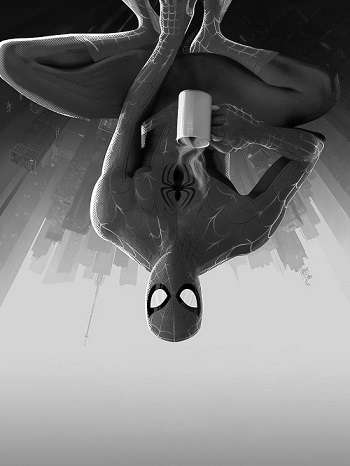

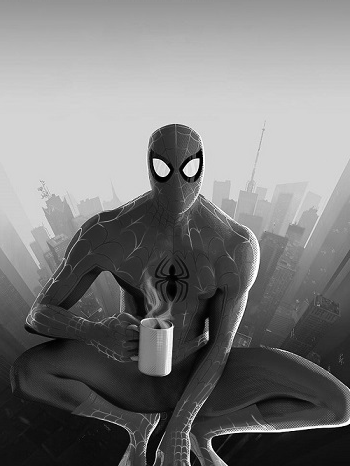

In [2]:
# Read the image
rootPath = "/content/drive/MyDrive/cv/programming_assignments/"
imgPath = rootPath+"assets/upsiede-down-me.jpg"
img = cv2.imread(imgPath)

# Display its dimensions
display(img.shape)

# Greyscale it
#greyscaleImg = np.mean(img, 2)
grayscaleImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the dimensions of the greyscalled image
display(grayscaleImg.shape)

# *Answer the question given in the text cell above*
display("For the input color image there are 3 channels, one for each color (Blue, Green, Red). This can be seen as the last value in the dimensions output. After grayscaling it, the dimension would now reduce since grayscale image can be represented as a single matrix.")

# Display the greyscalled image
cv2_imshow(grayscaleImg)

# Correct the poster of spidey and display it
grayscaleImgRotated = cv2.rotate(grayscaleImg, cv2.ROTATE_180)
cv2_imshow(grayscaleImgRotated)

### Zero-Padding (5 Marks) 🎮

Zero-padding adds zeros around the border of an image:

The main benefits of padding are the following:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.


Implement the <code>zero_pad</code> function which will pad the image. You can't use <code>np.pad</code> to do this, come up with your own padding function 😈

In [54]:
X = np.zeros((6, 7))
A = np.ones((4, 5))

#X[pad:X.shape[0]+pad][pad:X.shape[1]+pad] = X[pad:X.shape[0]+pad][pad:X.shape[1]+pad] + 1
pad = 1

X[pad:pad+A.shape[0],pad:pad+A.shape[1]] = A

print(X)


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [57]:
def zero_pad(X, pad):
    """
    Arguments:
    X -- python numpy array of shape (H, W) representing an image where H represents the height and W representd the width
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """

    #calculate size of matrix with required padding
    X_pad_H = X.shape[0]+2*pad
    X_pad_W = X.shape[1]+2*pad

    #create the target matrix with zeros
    X_pad = np.zeros((X_pad_H, X_pad_W))

    #copy the input matrix contents to the respective position in target matrix
    X_pad[pad:pad+X.shape[0], pad:pad+X.shape[1]] = X

    return X_pad

### Visualization of Zero padding 🙈
Just run the following cell to see if your padding's working fine.

Shape of x_pad:  (7, 7)


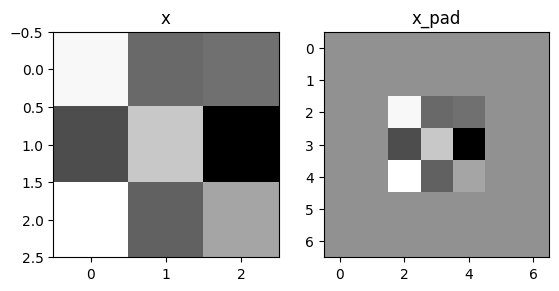

In [59]:
# visualizing the zero_pad's fucntion's output.
np.random.seed(1)
x = np.random.randn(3, 3)
x_pad = zero_pad(x, 2)
print("Shape of x_pad: ", x_pad.shape)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

### 2D Convolution (10 Marks) 🤓

2D covolution is the process of applying a filter to an image. Implement the <code>conv2D</code> function that will be used to build a convolutional unit which:

- Takes an input image
- Applies a filter keeping as per padding and stride parameters
- Outputs another image (usually, but not necessarily, of different size)

In [ ]:
def conv2D(inp, F, pad, stride):
    """
    Arguments:
    inp -- output activations of the previous layer (can also be conceptualized as the input image), numpy array of shape (n_H, n_W)
    F -- Filter, numpy array of shape (f, f)
    pad -- integer
    stride -- integer
    """

    conv_output = None


    if pad > 0:
      inp = zero_pad(inp, pad)

    f_H, f_W = F.shape
    inp_H, inp_W = inp.shape

    conv_output = np.zeros((inp_H - f_H/2 + 1, inp_W - f_W/2 + 1))
    print(conv_output)



    return conv_output

pad = 1
inp = np.ones((5, 5))
F = np.ones((3, 3))*2
###
if pad > 0:
  inp = zero_pad(inp, pad)

f_H, f_W = F.shape
inp_H, inp_W = inp.shape

conv_output = np.zeros((inp_H - f_H + 1, inp_W - f_W + 1))

conv_output_H = conv_output.shape[0]
conv_output_W = conv_output.shape[1]

for i in range(conv_output_W):
  for j in range(conv_output_H):
    conv_output =

print(conv_output)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Testing Convolution (7 Marks) 🧪
- Use Lord Voldemort's picture (`voldemort.jpg`) in the `assets` folder and greyscale it.
- Resize it to 350x400.
- Come up with a filter that sharpens The Dark Lord's face.
- Use the `conv2D` function you defined above to apply that filter to the image.
- Display the unsharp and the sharpened images.


In [ ]:
### Code Here ###

#################

### Filter Banks 🏦

You have come across different kinds of filters and various examples of them in the lectures. In the rest of the notebook, you will be experimenting with some of them. Some questions may require you to come up with your own filters as well

### Edge Detection (15 Marks) 🐳
You are required to do the following tasks:
- <b>Read</b> the image(s) provided to you in the `Images` folder.
- You are required to apply various pre-processing techniques on the read image(s) to prepare them for edge detection tasks. This should be done keeping in mind that the task is of edge detection and not color detection.

In [ ]:
# read all the provided images "Images" folder in a list here

input_images = None

### Code Here ###



#################

In [ ]:
# apply pre-processing on the read image(s) here

preprocessed_list_of_images = None
# or preprocessed_image = None

### Code Here ###



#################


Study the images to see how they are laid out before starting with the following tasks:
- Make a filter that gives a "high" activation on horizontal lines
- Make a filter that gives a "high" activation on vertical lines
- Make a filter that gives a "high" activation on circles
- Make a filter that gives a "high" activation on right to left diagonals
- Make a filter that gives a "high" activation on left to right diagonals

<b>Note:</b> You have to apply the filter using the <code>conv2D</code> function you made earlier. You must display each filter's result. If you fail to do so, 0 marks will be awarded for that part.  


#### Horizontal Filter 🚥

In [ ]:
# initialize and apply horizontal edge detection filter on images in "Horizontal Lines" folder and display the results

h_filter = None

### Code Here ###


#################

#### Vertical Filter 🚦

In [ ]:
# initialize and apply vertical edge detection filter on images in "Vertical Lines" folder and display the results

v_filter = None

### Code Here ###



#################

#### Right to Left Diagonal Filter 🙆🏻‍♂️

In [ ]:
# initialize and apply right-to-left diagonal edge detection filter on the images in "Right to Left" folder and display the results

rlDiag_filter = None

### Code Here ###



#################

#### Left to Right Diagonal Filter 🙆🏻‍♀️

In [ ]:
# initialize and apply left-to-right diagonal edge detection filter on the images in "Left to Right" folder and display the results

lrDiag_filter = None

### Code Here ###



#################

#### Circle Filter ⭕

In [ ]:
# initialize and apply circular pattern's edge detection filter on the images in "Circles" folder and display the results.

c_filter = None

### Code Here ###



#################

#### Fun Part 👻

In [ ]:
# read and display the provided images from "Target_Images" folder here

target_images = None

### Code Here ###



#################

### Combining Filters (18 Marks) ☠️
You can use a combination of filters to detect complex shapes other than lines. For this you will be using the images from the "Target_images" folder. </br>
Using only the above filters to detect the edges. </br>


1. Display the original image.
2. Preprocess the image.
2. Combine the above filters to create a filter which will detect horizontal, vertical, diagonal lines, or cirlcular patterns (as per your need).
3. Apply the filter using `conv2d` and display the output.
4. Use MSE (Mean Squared Error) to find the difference between the output and the preprocessed image.

In [ ]:
# initialize and apply detection filter on "stars.jpg" image and display result

stars_filter = None

### Code Here ###



#################

In [ ]:
# initialize and apply detection filter on "chrome_logo.jpg" image and display result

chrome_filter = None

### Code Here ###



#################

In [ ]:
# initialize and apply detection filter on "ben_10.jpg" image and display result

ben10_filter = None

### Code Here ###



#################

### Filter Bank for texture detection to classify images 🚁
There are numerous filter banks which can be used to classify the images. One such filter bank is  **Leung-Malik Fitler Bank** which was introduced by Thomas Leung and Jetindera Malik in their paper "[Representing and Recognizing the Visual Appearance of Materials using Three-dimensional Textons](http://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)"</br></br>
The LM filter bank is designed to capture various **texture** features in the images. The LM filter bank has a mix of edge, bar and spot filters at multiple scales and orientations. It has a total of 48 filters - 2 Gaussian derivative filters at 6 orientations and 3 scales, 8 Laplacian of Gaussian filters and 4 Gaussian filters as shown below:</br></br>
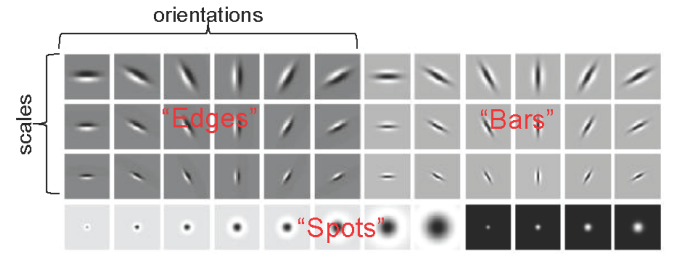

Some of the important LM filters (5x5) are given to you in the code section below. You can visualize them by running the cell.


In [ ]:
# Spot filter (Spotlike texture)
spot = np.array([[-1, -1, -1, -1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1,  1,  8,  1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1, -1, -1, -1, -1]])

# Vertical filter (Vertical Stripe texture)
vertical = np.array([[1, 2, 0, -2, -1],
                     [4, 8, 0, -8, -4],
                     [6,12, 0,-12, -6],
                     [4, 8, 0, -8, -4],
                     [1, 2, 0, -2, -1]])

# Horizontal filter (Horizontal Stripe texture)
horizontal = np.array([[-1, -4, -6, -4, -1],
                      [-2, -8,-12, -8, -2],
                      [ 0,  0,  0,  0,  0],
                      [ 2,  8, 12,  8,  2],
                      [ 1,  4,  6,  4,  1]])

# Diagonal filter (top left To bottom right)
diagonal_tlTbr = np.array([
                      [ 2,  1, -1, -2, -2],
                      [ 1,  2,  1, -1, -2],
                      [-1,  1,  2,  1, -1],
                      [-2, -1,  1,  2,  1],
                      [-2, -2, -1,  1,  2]])

# Diagonal filter (top right To bottom left)
diagonal_trTbl = np.array([
                      [-2, -2, -1,  1,  2],
                      [-2, -1,  1,  2,  1],
                      [-1,  1,  2,  1, -1],
                      [ 1,  2,  1, -1, -2],
                      [ 2,  1, -1, -2, -2]])

fig, axarr = plt.subplots(5, 1)
axarr[0].set_title('Spot filter (Spotlike texture)')
axarr[0].imshow(spot,cmap='gray')

axarr[1].set_title('Vertical Stripe texture')
axarr[1].imshow(vertical,cmap='gray')

axarr[2].set_title('Horizontal Stripe texture')
axarr[2].imshow(horizontal,cmap='gray')

axarr[3].set_title('Top left to bottom right diagonal texture filter')
axarr[3].imshow(diagonal_tlTbr,cmap='gray')

axarr[4].set_title('Top right to bottom left diagonal texture filter')
axarr[4].imshow(diagonal_trTbl,cmap='gray')

fig.set_size_inches(6, 9)
plt.subplots_adjust(hspace=1)

## Image Classification (30 Marks) 🤖
In this part you will be using images from the `classifcation` folder. First, you will read train images of spiderman's and thanos's images (`train_spidey.jpg` and `train_thanos.png` respectively). Then, you'll use the filter bank defined above to classify the images in the `test` folder </br></br>
**NOTE:** *It's not necessary to strictly use the pre-defined filter bank. You can also come up with your own bank or add more filters to the one defined above*.

#### Creating feature vector
You'll be creating a feature vector for each image (for their individual features) and then calculate the Eucledean distance among the corresponding feture vectors between the testing and the training images (refer to the lecture-03 slides for this). </br></br>After apply the filters defined above (as per your need) on the training and test images, you'll need to perform average pooling to create a feature vector.

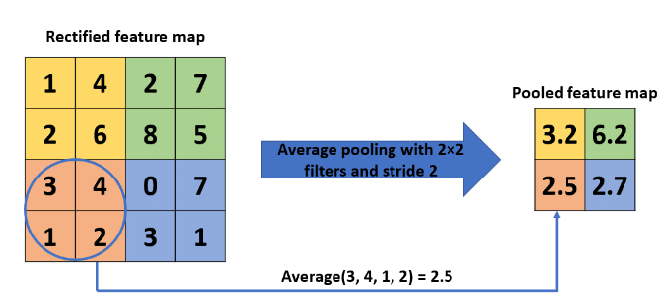

In [ ]:
### Code Here ###
# Step 1: Read the image 'train_spidey.jpg' from the classification folder.
# Step 2: Convert the image from RGB to gray Scale.
# Step 3: Resize the image to it to 400x400.
# Step 4: Apply the filters to the resized greyscalled image and display the results.
# Step 5: Perform average pooling with 10x10 filter and stride 10, this will give you 40x40 image matrix.
# Step 6: Store the 40x40 i.e 800 values in a vector. That vector will be your feature vector.
# Step 7: Concatenate all feture vectors. If you have applied n filter then this step will result in nx800 matrix of image features.
# Step 8: Repeat Step#1 till Step#7 for 'train_thanos.png'.


### Evaluate Results (This is where the actual fun begins🦋)
Classify each test image based on the Eucledean distances calculated between each corresponding feature vector. </br>


In [ ]:
### Code here ###
# Step 1: Read the images from the 'test' folder (apply the necessary pre-processing techinques).
# Step 2: Create feature vectors for each test image.
# Step 3: Compute the Euclidean distance between features of 'train_spidey.jpg' image with the features of each of the test image.
# Step 4: Compute the Euclidean distance between features of 'train_thanos.png' image with the features of each of the test image.
# Step 3: Classify each of the test image as either Spider-Man or Thanos based on the minimum value of Euclidean distance among the feature vectors.

## Analyze Results (7 Marks)
a) How many of these were correctly classified? </br>
b) Which different features were you trying to highlight in each building while designing the filters?

# Congratulations for the assignment completion 🎖️
...to be continued